# Uso de Machine Learning para classificação de doenças cardiovasculares

Uma das principais causas de morte no mundo são doenças cardiovasculares. O desenvolvimento dessas doenças está muito relacionado a fatores de risco, como hipertensão, e ao estilo de vida. A ideia do projeto é analisar uma base de dados sobre doenças cardiovasculares, identificando a relação entre o estilo de vida e o desenvolvimento de DCV e os padrões existentes entre os dados dos indivíduos que apresentam algum tipo de doença. Com isso, é possível analisar a probabilidade de uma pessoa desenvolver doenças cardiovasculares a partir de seus dados médicos do paciente.

O dataset trabalhado "Cardiovascular Disease Dataset" obtido por meio da plataforma [Kaggle](https://www.kaggle.com/), encontrado neste [link](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset). Os dados contém informações de 70000 mil pacientes, divididos em 12 features.

### Atributos

* age(idade)
* height(altura)
    cm
* wieght (peso)
    kg
* gender(gênero)
    1:mulher
    2:homem
* ap_hi (pressão arterial sistólica)
* ap_lo(pressão arterial diastólica)
* cholesterol (colesterol)
    1: normal
    2: acima do normal
    3: bem acima do normal
* gluc (glicose)
    1: normal
    2: acima do normal
    3: bem acima do normal
* smooke (fumante ou não)
    0: não fumante
    1:fumante
* alco (se faz ingestão de bebidas alcoólicas)
    0: não faz ingestão
    1: faz ingestão
* active (se pratica atividade física)
    0: não realiza atividade fisica
    1: realiza atividades físicas
* cardio(se possui ou não doenças cardiovasculares)
    0: não contém doenças cardiovasculares
    1: contém doenças cardioavasculares

In [2]:
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from graphviz import Digraph


### Importando os dados

In [3]:
df = pd.read_csv('/home/kassia/UFC/ML/projeto final/cardio_train.csv', delimiter=';')

In [7]:
df.head(10)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [8]:
print('Número de entradas\pacientes:\t {}'.format(df.shape[0]))
print('Número de variáveis\atributos pessoais e médicos:\t {}'.format(df.shape[1]))

Número de entradas\pacientes:	 70000
Número de variáveistributos pessoais e médicos:	 13


 # Análise Exploratória dos dados

In [9]:
#Tipos das variáveis
df.dtypes.sort_values()

id               int64
age              int64
gender           int64
height           int64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
weight         float64
dtype: object

In [10]:
#analisando os valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

A partir dos dados apresentados acima, é possível notar que o dataset nã possui valores faltantes para nenhuma das feautres analisadas, demostrando que os dados estão bem completos.

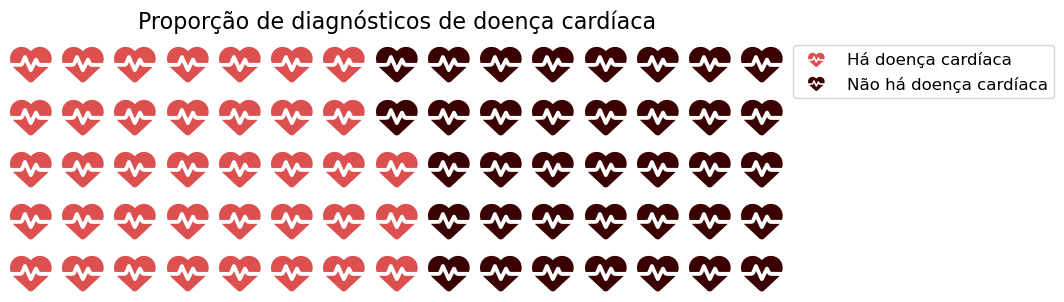

In [24]:
# instalando pacote waffle
!pip install pywaffle -q
from pywaffle import Waffle

# extrair value counts da variavel ocorrencia_classificacao
cardio = df['cardio'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de diagnósticos de doença cardíaca',  'fontsize': 16},
                values=cardio, icons='heartbeat', icon_size=30, labels=('Há doença cardíaca','Não há doença cardíaca'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

In [12]:
#analisando a quantidade de pacientes que apresentam ou não doenças cardiovasculares
print('Proporção de pacientes diagnosticados como não tendo doença cardíaca:\t {}%'.format(((df['cardio'].value_counts()[0]/df.shape[0])*100).round(2)))
print('Proporção de pacientes diagnosticados com alguma doença cardíaca:\t {}%'.format(((df['cardio'].value_counts()[1]/df.shape[0])*100).round(2)))


Proporção de pacientes diagnosticados como não tendo doença cardíaca:	 50.03%
Proporção de pacientes diagnosticados com alguma doença cardíaca:	 49.97%


In [13]:
count_cardio = df['cardio'].value_counts()
count_cardio

0    35021
1    34979
Name: cardio, dtype: int64

Pelo gráfico acima nota-se que a maioria dos pacientes não foram diagnosticados com nenhuma doença cardiovascular. Também é possível notar que a diferença entre as duas classes é bem pequena. O resultado das proporçãoes presentado acima confirma tal resutaldo, o que demontra que os dados do dataset estao balanceados.

Nos gráficos a seguir é possível observar a distruição da idade, altura e peso dos pacientes.

/home/kassia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kassia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kassia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='height', ylabel='Density'>

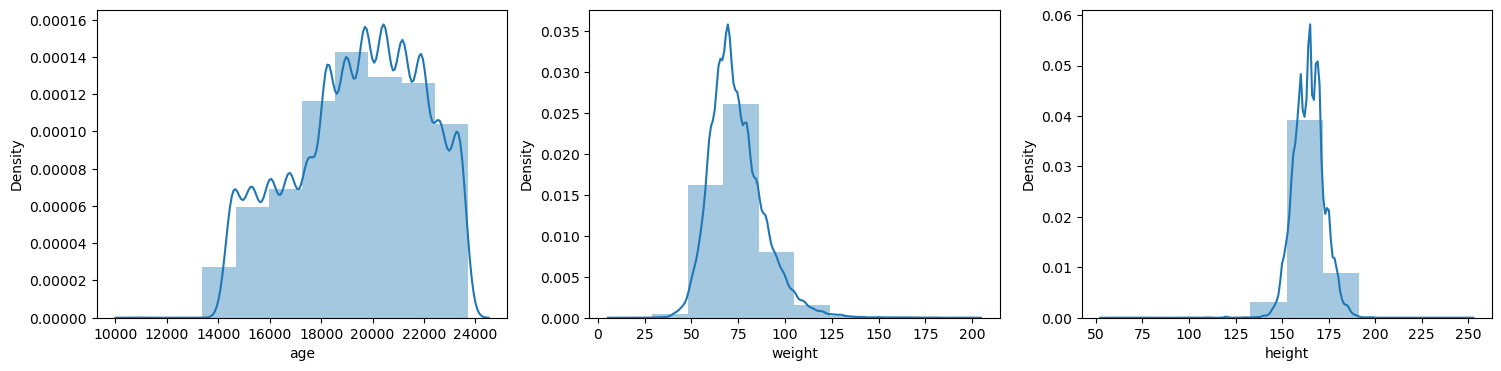

In [14]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.distplot(df.age, bins=10, kde=True, ax=axes[0])
sns.distplot(df.weight, bins=10, kde=True, ax=axes[1])
sns.distplot(df.height, bins=10, kde=True, ax=axes[2])

### Correlação entre a variável alvo(cardio) e as demais variáveis 

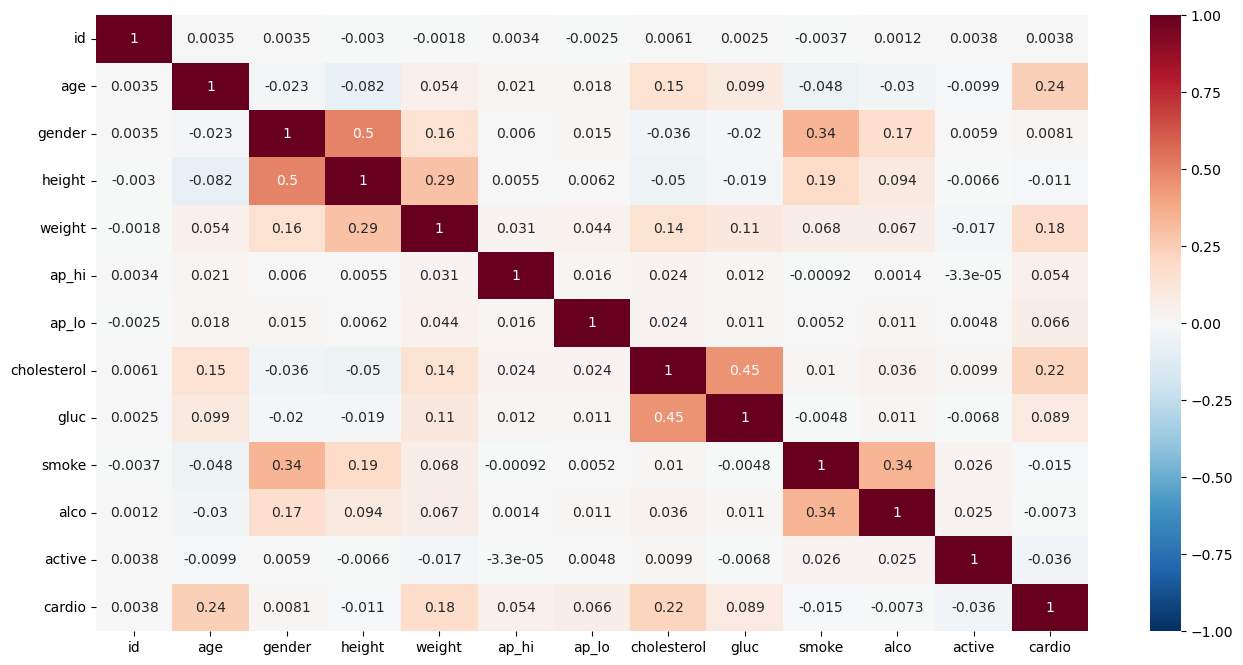

In [15]:
correlation = df.corr()

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

A partir do gráfico de correlação apresentado a seguir, nota-se que as variáveis idade, peso e colesterol são as que mais se correlacionam com a variável cardio, que identifica se a pessoa possui ou não alguma doença cardíaca.

A relação entre algumas variáveis e a variável cardio pode ser observada nos gráficos abaixo. Para realizar a análise, os dados foram divididos em duas amostras: pacientes sem doença cardíaca e pacientes com doença cardíaca.

Text(0.5, 0, '')

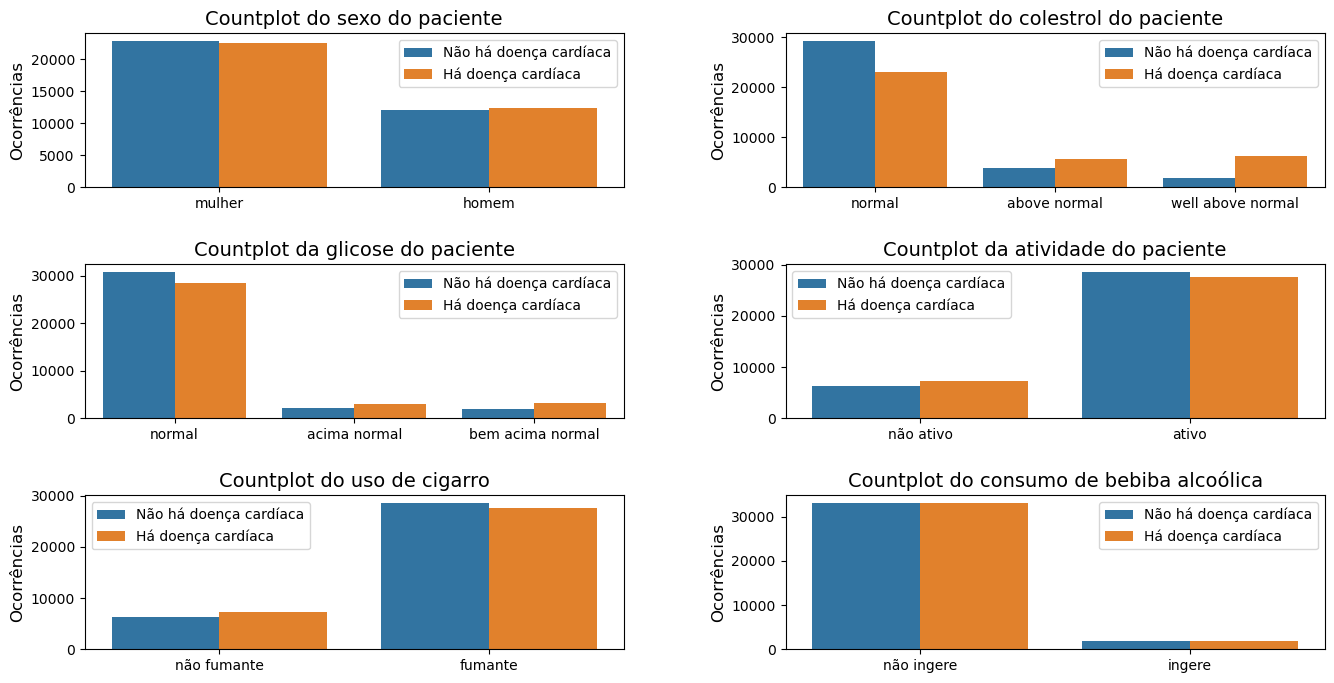

In [16]:

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# countplot sex
sns.countplot(x='gender', data=df, hue='cardio', ax=ax[0,0])
ax[0,0].set_xticklabels(['mulher','homem'])
ax[0,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Ocorrências', fontsize = 12)
ax[0,0].set_title('Countplot do sexo do paciente', fontsize=14)
ax[0,0].set_xlabel('')

# countplot cholesterol
sns.countplot(x='cholesterol', data=df, hue='cardio', ax=ax[0,1])
ax[0,1].set_xticklabels(['normal','above normal','well above normal'])
ax[0,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('Ocorrências', fontsize = 12)
ax[0,1].set_title('Countplot do colestrol do paciente', fontsize=14)
ax[0,1].set_xlabel('')


# countplot gluc
sns.countplot(x='gluc', data=df, hue='cardio', ax=ax[1,0])
ax[1,0].set_xticklabels(['normal','acima normal','bem acima normal'])
ax[1,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('Ocorrências', fontsize = 12)
ax[1,0].set_title('Countplot da glicose do paciente', fontsize=14)
ax[1,0].set_xlabel('')

# countplot phisical activity
sns.countplot(x='active', data=df, hue='cardio', ax=ax[1,1])
ax[1,1].set_xticklabels(['não ativo','ativo'])
ax[1,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('Ocorrências', fontsize = 12)
ax[1,1].set_title('Countplot da atividade do paciente', fontsize=14)
ax[1,1].set_xlabel('')

# countplot smoking
sns.countplot(x='active', data=df, hue='cardio', ax=ax[2,0])
ax[2,0].set_xticklabels(['não fumante','fumante'])
ax[2,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,0].set_ylabel('Ocorrências', fontsize = 12)
ax[2,0].set_title('Countplot do uso de cigarro', fontsize=14)
ax[2,0].set_xlabel('')

# countplot alcohol
sns.countplot(x='alco', data=df, hue='cardio', ax=ax[2,1])
ax[2,1].set_xticklabels(['não ingere','ingere'])
ax[2,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,1].set_ylabel('Ocorrências', fontsize = 12)
ax[2,1].set_title('Countplot do consumo de bebiba alcoólica', fontsize=14)
ax[2,1].set_xlabel('')

Pelos graficos é possível fazer algumas observações como:
* A maior parte dos pacientes são do gênero feminino.Apesar do resultado das amostras para mulheres e homens estarem bem balanceadas é possível notar que o número de mulheres que não apresentam alguma doença cardiovascular é maior, enquanto no grupo dos homens a quantidade que apresentam alguma doença é maior.
* Pelo countplot do colesterol é possível confirmar a relação observada no gráfico de correlações. É possível notar que a maior parte dos pacientes que apresentam colesterol normal não possuem nenhuma doença. Já entre as pessoas que possuem colestrol 'acima do normal' e 'bem acima do normal' é maior o número de casos com diagnóstico de alguma doença.
* Entre os pacientes que apresentam glicose 'acima do normal' ou 'bem acima do normal' nota-se que é maior o número de pessoas que são diagnosticadas com a doença.
* É grande a diferença de proporção entre os que praticam e não praticam nenhuma atividade física. Apesar dos dados se mostrarem balanceados entre as amostras, os pacientes que não praticam nenhum tipo de atividade tem maior tendência a apresentar alguma doença. O mesmo pode ser observado quando analisado o uso de cigarros. Entre os que se declaram fumantes é maior a ocorrência de diagnósticos positivos para alguma doença cardiovascular. 

### Modelos de classificação

A fim de classificar os pacientes como tendo ou não alguma doença cardíaca a partir de alguns dados clínicos, alguns algoritmos de classificação foram aplicados.

In [34]:


y = df['cardio']
x = df.drop(['cardio'], axis=1, inplace=False)

In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=51)

### KNN

In [21]:
modelKNN = KNeighborsClassifier(n_neighbors=25)
modelKNN.fit(x_train, y_train)
y_predicted = modelKNN.predict(x_test)
y_predicted

/home/kassia/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 1, ..., 0, 1, 0])

### Métricas e matriz de confusão

In [21]:
print("Relatório de Classificação KNN:\n", classification_report(y_test, y_predicted, digits=4))


Relatório de Classificação KNN:
               precision    recall  f1-score   support

           0     0.5887    0.5802    0.5844      7124
           1     0.5714    0.5800    0.5757      6876

    accuracy                         0.5801     14000
   macro avg     0.5800    0.5801    0.5800     14000
weighted avg     0.5802    0.5801    0.5801     14000



In [22]:
KNN_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Acurácia: " + str(KNN_accuracy))

Acurácia: 0.58


In [23]:
metrics.confusion_matrix(y_test, y_predicted)

array([[4133, 2991],
       [2888, 3988]])

De acordo com a matriz de confusão, temos que:
* O algoritmo previu corretamente 4133 de pessoas que foram diagnosticadas com a doença
* O modelo previu que 2991 pessoas sem diagnóstico teriam alguma doença cardíaca
* 2888 pessoas que possuem doença cardíaca foram diagnosticadas sem doença

* Além disso, o modelo previu corretamente que 3988 pessoas que não possuem diagnóstico de doença cardíaca 

### Árvore de decisão

In [24]:
!pip install pydotplus

In [7]:
modelDT = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=13)
modelDT.fit(x_train, y_train)
y_predicted = modelDT.predict(x_test)
y_predicted

array([1, 1, 0, ..., 1, 1, 0])

In [26]:
#from sklearn.externals.six import StringIO 
from six import StringIO

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

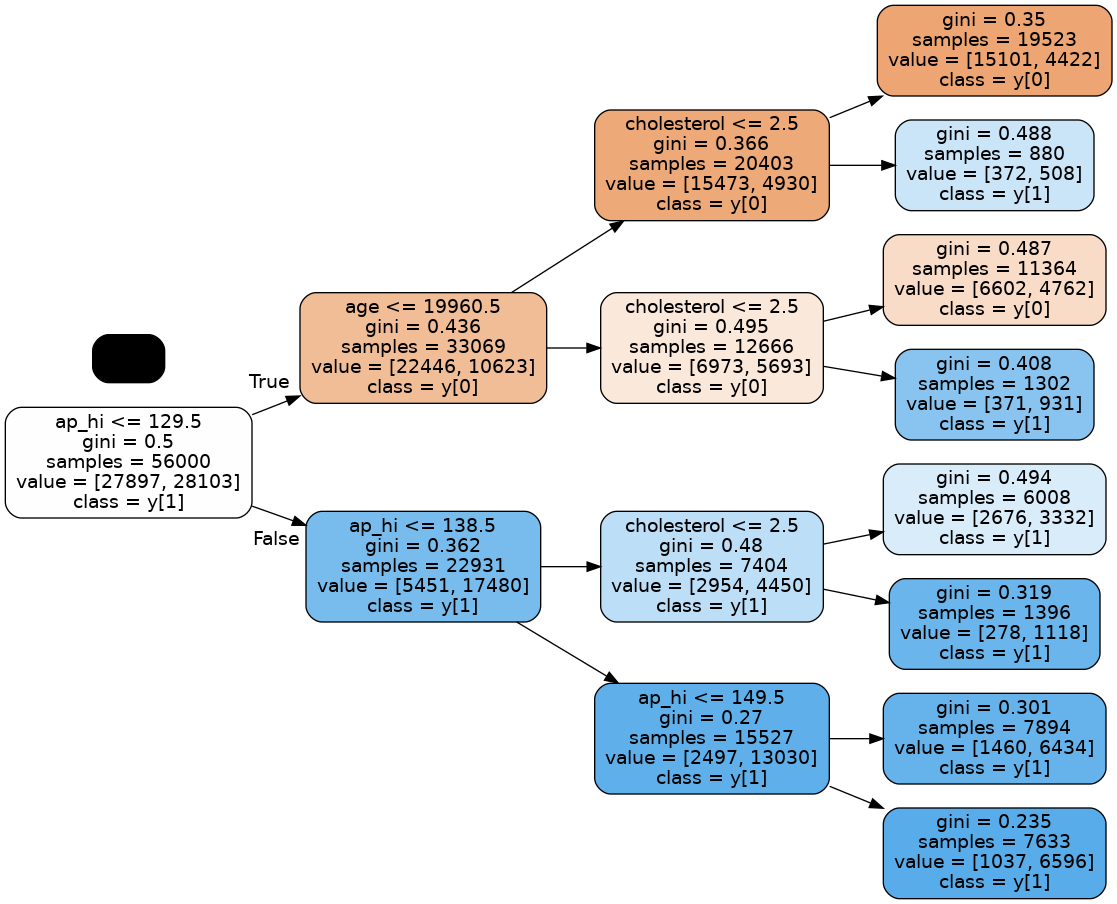

In [35]:
dot_data = StringIO()

export_graphviz(modelDT, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=x.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### métricas e matriz de confusão

In [8]:
print("Relatório de Classificação Decision Tree:\n", classification_report(y_test, y_predicted, digits=4))


Relatório de Classificação Decision Tree:
               precision    recall  f1-score   support

           0     0.7145    0.7732    0.7427      7124
           1     0.7431    0.6799    0.7101      6876

    accuracy                         0.7274     14000
   macro avg     0.7288    0.7265    0.7264     14000
weighted avg     0.7286    0.7274    0.7267     14000



In [9]:
DT_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Acurácia: " + str(DT_accuracy))

Acurácia: 0.73


In [10]:
metrics.confusion_matrix(y_test, y_predicted)

array([[5508, 1616],
       [2201, 4675]])

De acordo com a matriz de confusão, temos que:
* O algoritmo previu corretamente 5508 de pessoas que foram diagnosticadas com a doença
* O modelo previu que 1616 pessoas sem diagnóstico teriam alguma doença cardíaca
* 2201 pessoas que possuem doença cardíaca foram diagnosticadas sem doença

* Além disso, o modelo previu corretamente que 4675 pessoas que não possuem diagnóstico de doença cardíaca 

### Random Forest Predictor

In [11]:
model_RF = RandomForestClassifier(n_estimators=50, random_state=17)
model_RF.fit(x_train, y_train)
y_predicted = model_RF.predict(x_test)
y_predicted

array([1, 1, 0, ..., 1, 1, 0])

 ### métricas e matriz de confusão

In [12]:
print("Relatório de Classificação Random Forest:\n", classification_report(y_test, y_predicted, digits=4))


Relatório de Classificação Random Forest:
               precision    recall  f1-score   support

           0     0.7205    0.7382    0.7293      7124
           1     0.7217    0.7033    0.7124      6876

    accuracy                         0.7211     14000
   macro avg     0.7211    0.7208    0.7208     14000
weighted avg     0.7211    0.7211    0.7210     14000



In [13]:
RF_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Acurácia: " + str(RF_accuracy))

Acurácia: 0.72


In [14]:
metrics.confusion_matrix(y_test, y_predicted)

array([[5259, 1865],
       [2040, 4836]])

De acordo com a matriz de confusão, temos que:
* O algoritmo previu corretamente 5259 de pessoas que foram diagnosticadas com a doença
* O modelo previu que 1865 pessoas sem diagnóstico teriam alguma doença cardíaca
* 2040 pessoas que possuem doença cardíaca foram diagnosticadas sem doença

* Além disso, o modelo previu corretamente que 4836 pessoas que não possuem diagnóstico de doença cardíaca 

 ### Modelo de regressão linear

In [15]:
modelRL = linear_model.LogisticRegression(solver='liblinear')
modelRL.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [16]:
y_predicted = modelRL.predict(x_test)
y_score = modelRL.predict_proba(x_test)


print("y_pred: \n", y_predicted[0:2])
print("\ny_score: \n", y_score[0:2])

y_pred: 
 [1 1]

y_score: 
 [[0.19074394 0.80925606]
 [0.217784   0.782216  ]]


 ### métricas e matriz de confusão

In [17]:
print("Relatório de Classificação Logistic Regression:\n", classification_report(y_test, y_predicted, digits=4))



Relatório de Classificação Logistic Regression:
               precision    recall  f1-score   support

           0     0.7083    0.7368    0.7223      7124
           1     0.7154    0.6856    0.7002      6876

    accuracy                         0.7116     14000
   macro avg     0.7119    0.7112    0.7112     14000
weighted avg     0.7118    0.7116    0.7114     14000



In [18]:
RL_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Acurácia: " + str(RL_accuracy))

Acurácia: 0.71


In [19]:
metrics.confusion_matrix(y_test, y_predicted)

array([[5249, 1875],
       [2162, 4714]])

De acordo com a matriz de confusão, temos que:
* O algoritmo previu corretamente 5249 de pessoas que foram diagnosticadas com a doença
* O modelo previu que 1875 pessoas sem diagnóstico teriam alguma doença cardíaca
* 2162 pessoas que possuem doença cardíaca foram diagnosticadas sem doença

* Além disso, o modelo previu corretamente que 4714 pessoas que não possuem diagnóstico de doença cardíaca 

### Comparação entre os classificadores

A comparação entre a acurácia conseguida em cada algoritmo utilizado é apresentada a seguir. Percebe-se que, com excessão do KNN, todos apresentaram métricas boas, mas que ainda podem ser melhorados na próxima etapa.

In [23]:
compare_scores = {'Decission Tree': DT_accuracy, 'Random Forest': RF_accuracy, 'k-Nearest Neighbors Algorithm': KNN_accuracy, 'Logistic Regression': RL_accuracy}
compare_scores

{'Decission Tree': 0.73,
 'Random Forest': 0.72,
 'k-Nearest Neighbors Algorithm': 0.58,
 'Logistic Regression': 0.71}